# Visualizations for Presentation

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import roc_curve

from collections import Counter
from datetime import datetime

import plotly.express as px
#import geopandas as gpd
#from shapely.geometry import Point, Polygon

from src import eda_feat_eng_utils
from src.eda_feat_eng_utils import return_true_if_in_list

### Import Dataset

In [ ]:
accidents = pd.read_csv('data/accidents.csv', index_col=0)

### Speed Limit

In [ ]:
speed_df = accidents.groupby('POSTED_SPEED_LIMIT')['is_fatal_or_incap'].agg(['count', 'sum'])
speed_df = pd.DataFrame(speed_df).reset_index()
speed_df['']

In [ ]:
def round_to_five_based(speed):
    if speed % 5 == 0:
        return speed
    else:
        return (speed // 5 + 1) * 5

In [ ]:
speed_df['posted_speed_limit'] = speed_df['POSTED_SPEED_LIMIT'].apply(lambda x: round_to_five_based(x))
speed_df2 = speed_df.groupby('posted_speed_limit').agg({'count': 'sum',
                                                          'sum': 'sum'}).reset_index()
speed_df2['prcnt_fatal'] = speed_df2['sum'] / speed_df2['count']

In [ ]:
speed_df2

In [ ]:
# fig, ax1 = plt.subplots(figsize=(12,6))

# ax1 = sns.barplot(x='posted_speed_limit', y='count',  data=speed_df2, palette='summer')

# ax2=ax1.twinx()

# ax2 = sns.lineplot(x='posted_speed_limit', y='prcnt_fatal', data=speed_df2, sort=False, color='red')

### Distribution by Hour of the Day

In [ ]:
df = accidents
class_col = 'is_fatal_or_incap'
fatal_arr = df[df[class_col] == 1]['CRASH_HOUR'].values
not_fatal_arr = df[df[class_col] == 0]['CRASH_HOUR'].values


fig, ax = plt.subplots(figsize=(10,5))
ax = sns.kdeplot(fatal_arr, shade=True, color="b", label = 'Fatal / Incapacitated')
ax = sns.kdeplot(not_fatal_arr, shade=True, color="r", label = 'Not Severe')
ax.legend()
# ax.set_title(title, fontsize=18)
ax.set_xlabel('Hour', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout();

#fig.savefig('img/hour_of_day_distribution.png')

---

## ROC Curve

In [3]:
log_roc = pd.read_csv('data/log_roc.csv')
rf_roc = pd.read_csv('data/rf_roc.csv')
gbt_roc = pd.read_csv('data/gbt_roc.csv')

In [4]:
y_test = log_roc['y_test_log'].values
y_log = log_roc['y_prob_log'].values
y_rf = rf_roc['y_prob_rf'].values
y_gbt = gbt_roc['y_prob_gbt'].values

In [8]:
y_prob_ns = [0 for _ in range(len(y_test))]

ns_fpr, ns_tpr, _ = roc_curve(y_test, y_prob_ns)
log_fpr, log_tpr, _ = roc_curve(y_test, y_log)
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_rf)
gb_fpr, gb_tpr, _ = roc_curve(y_test, y_gbt)


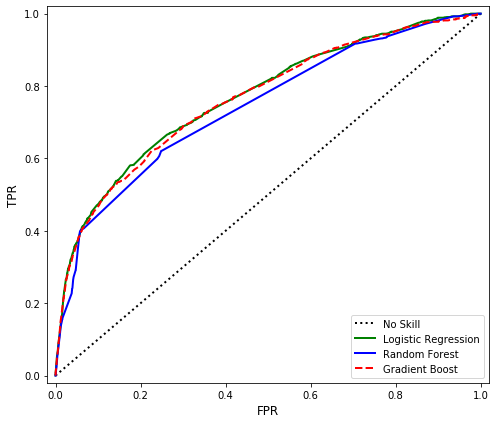

In [10]:
fig, ax = plt.subplots(figsize=(7,6))

fpr_arr = [ns_fpr, log_fpr, rf_fpr, gb_fpr]
tpr_arr = [ns_tpr, log_tpr, rf_tpr, gb_tpr]
colors = ['k:', 'g', 'b', 'r--']
names = ['No Skill', 'Logistic Regression', 'Random Forest', 'Gradient Boost']


for f, t, c, n in zip(fpr_arr, tpr_arr, colors, names):
    ax.plot(f, t, c, label=n, linewidth=2)

# ax.set_title('ROC Curve', fontsize=26, fontweight='bold')
ax.set_xlabel('FPR', fontsize=12)
ax.set_ylabel('TPR', fontsize=12)
ax.set_xlim(-0.02, 1.02)
ax.set_ylim(-0.02, 1.02)
ax.legend(loc='lower right')
plt.tight_layout();
plt.savefig('img/roc_curve.png')